<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/Nhandientien(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)
training_set=train_data.flow_from_directory('/content/drive/MyDrive/DATA_AI/Tien-20230411T145424Z-001/Tien/Train',target_size=(300,300), batch_size=32, class_mode='categorical')  
test_set=test_data.flow_from_directory('/content/drive/MyDrive/DATA_AI/Tien-20230411T145424Z-001/Tien/Validation',target_size=(300,300 ), batch_size=32, class_mode='categorical')  
training_set.class_indices
test_set.class_indices

Found 999 images belonging to 11 classes.
Found 115 images belonging to 11 classes.


{'100K': 0,
 '10K': 1,
 '1K': 2,
 '200K': 3,
 '200d': 4,
 '20K': 5,
 '2K': 6,
 '500K': 7,
 '500d': 8,
 '50K': 9,
 '5K': 10}

In [ ]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(512,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))


#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(512,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(11,activation = 'softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 150, 150, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_19 (LeakyReLU)  (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 75, 75, 64)       0         
 g2D)                                                 

In [ ]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 20 , batch_size= 15 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/20
32/32 [==============================] - 37s 1s/step - loss: 2.9593 - accuracy: 0.1041
Epoch 2/20
32/32 [==============================] - 34s 1s/step - loss: 2.4074 - accuracy: 0.1021
Epoch 3/20
32/32 [==============================] - 36s 1s/step - loss: 2.3502 - accuracy: 0.1421
Epoch 4/20
32/32 [==============================] - 34s 1s/step - loss: 2.1790 - accuracy: 0.1882
Epoch 5/20
32/32 [==============================] - 34s 1s/step - loss: 2.0192 - accuracy: 0.2553
Epoch 6/20
32/32 [==============================] - 34s 1s/step - loss: 1.9999 - accuracy: 0.2573
Epoch 7/20
32/32 [==============================] - 34s 1s/step - loss: 1.8077 - accuracy: 0.3193
Epoch 8/20
32/32 [==============================] - 35s 1s/step - loss: 1.6672 - accuracy: 0.3724
Epoch 9/20
32/32 [==============================] - 34s 1s/step - loss: 1.5392 - accuracy: 0.4194
Epoch 10/20
32/32 [==============================] - 35s 1s/step - loss: 1.4168 - accuracy: 0.4885
Epoch 11/20
32/32 [

In [ ]:
#Lưu
from keras.models import load_model
model.save("Nhandienchirtay(CNN).ipynb")
model_1=load_model('Nhandienchirtay(CNN).ipynb')

1/1 [==============================] - 1s 608ms/step
500K


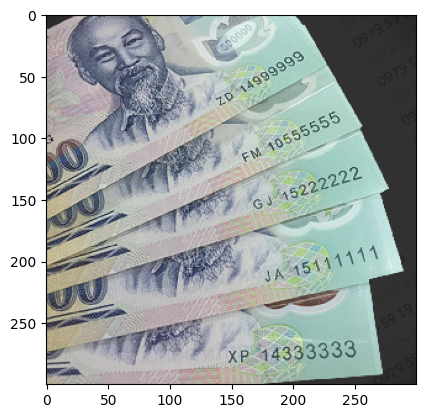

1/1 [==============================] - 0s 43ms/step
100K


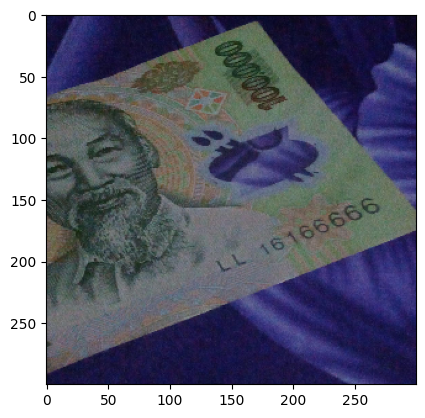

1/1 [==============================] - 0s 52ms/step
500K


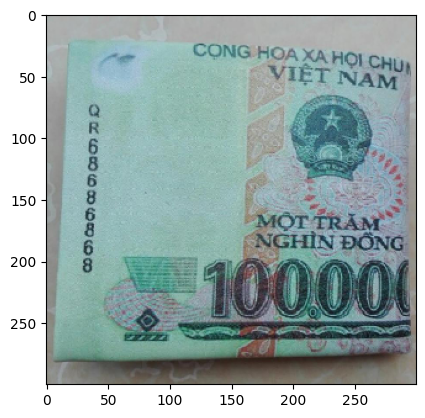

1/1 [==============================] - 0s 20ms/step
200K


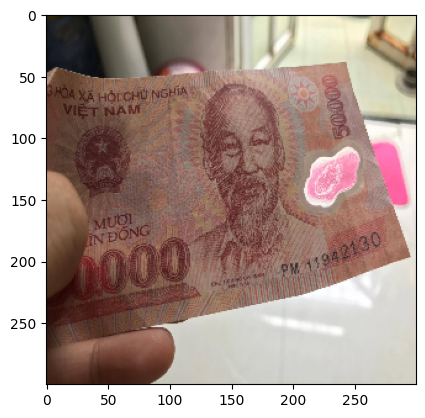

1/1 [==============================] - 0s 28ms/step
20K


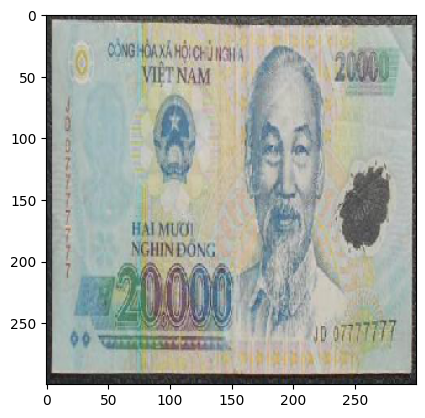

1/1 [==============================] - 0s 19ms/step
10K


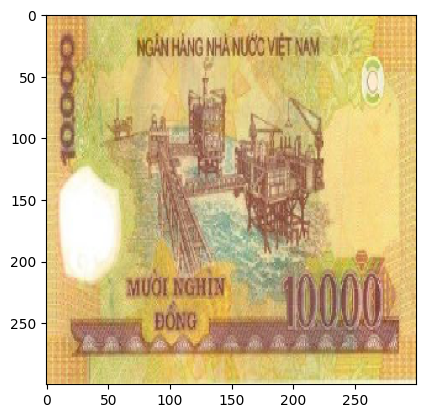

1/1 [==============================] - 0s 22ms/step
5K


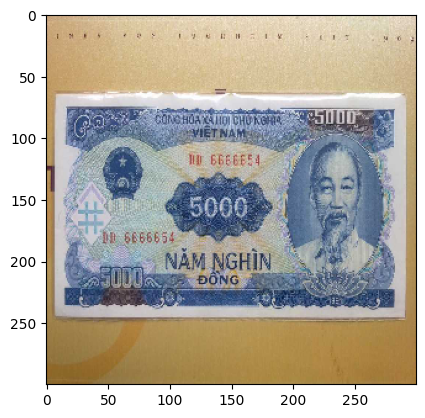

1/1 [==============================] - 0s 20ms/step
2K


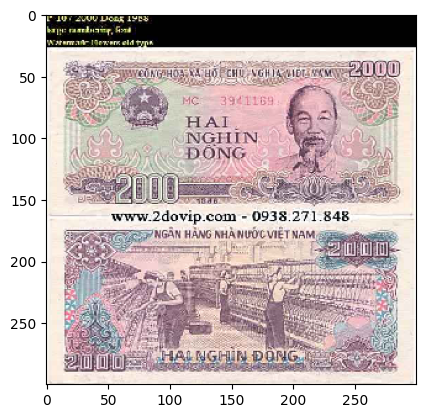

1/1 [==============================] - 0s 36ms/step
2K


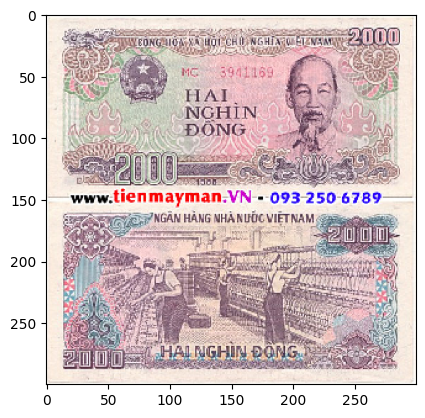

1/1 [==============================] - 0s 30ms/step
500K


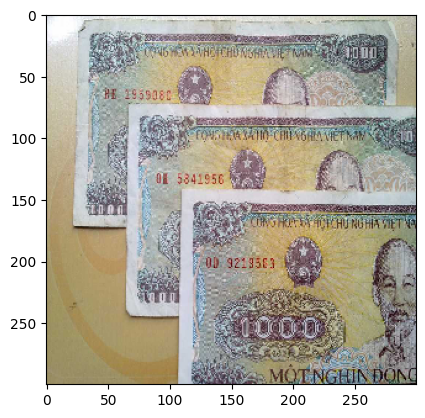

1/1 [==============================] - 0s 32ms/step
200dong


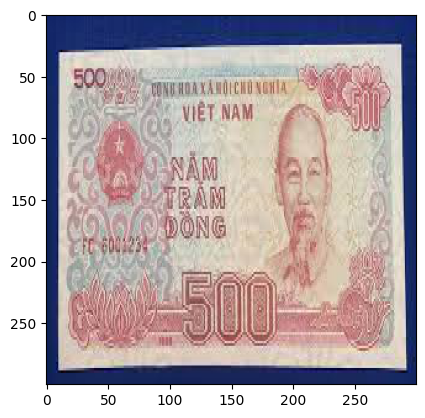

1/1 [==============================] - 0s 22ms/step
500dong


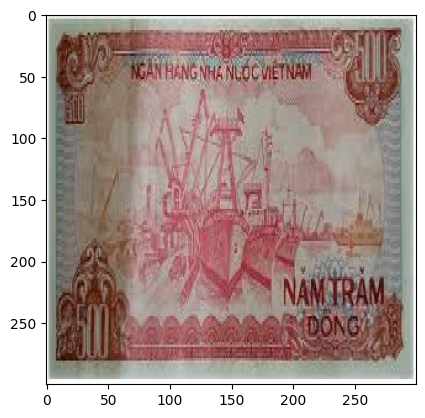

1/1 [==============================] - 0s 23ms/step
200K


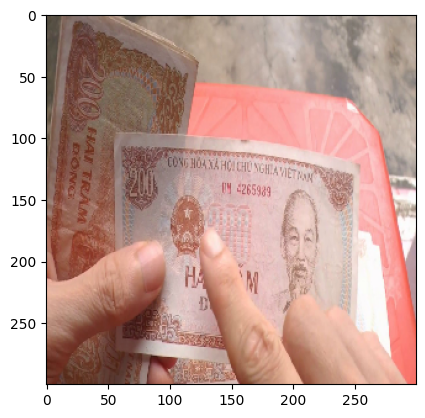

1/1 [==============================] - 0s 19ms/step
50K


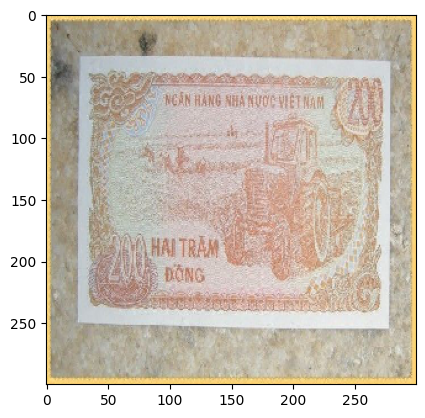

1/1 [==============================] - 0s 23ms/step
200K


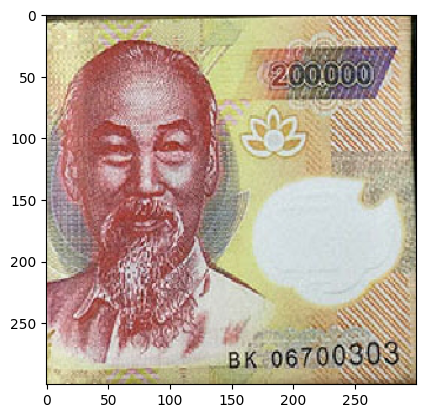

1/1 [==============================] - 0s 20ms/step
5K


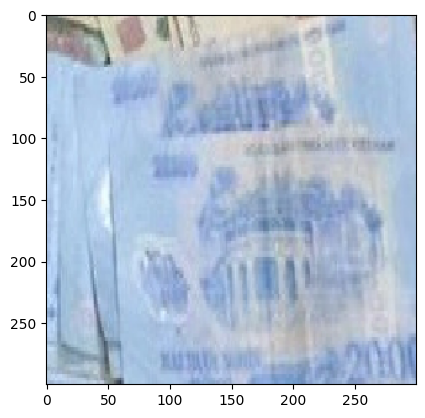

1/1 [==============================] - 0s 20ms/step
5K


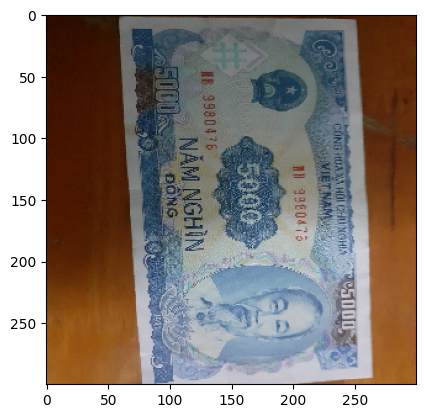

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
import matplotlib.pyplot as plt 
test='/content/drive/MyDrive/DATA_AI/Tien-20230411T145424Z-001/Tien/Test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['100K','10K','lK','200K','200dong', '20K','2K','500K','500dong','50K','5K']
  print(class_name[result]) 
  plt.show()
